# 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import missingno as msn

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 2. Read Data

> takehome_users.csv

In [3]:
df1 = pd.read_csv('takehome_users.csv', encoding='latin-1')
pd.set_option('display.max_columns', None)
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
df1.shape

(12000, 10)

In [5]:
df1.info() # last_session_creation_time & invited_by_user_id have empty cells

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
df1.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


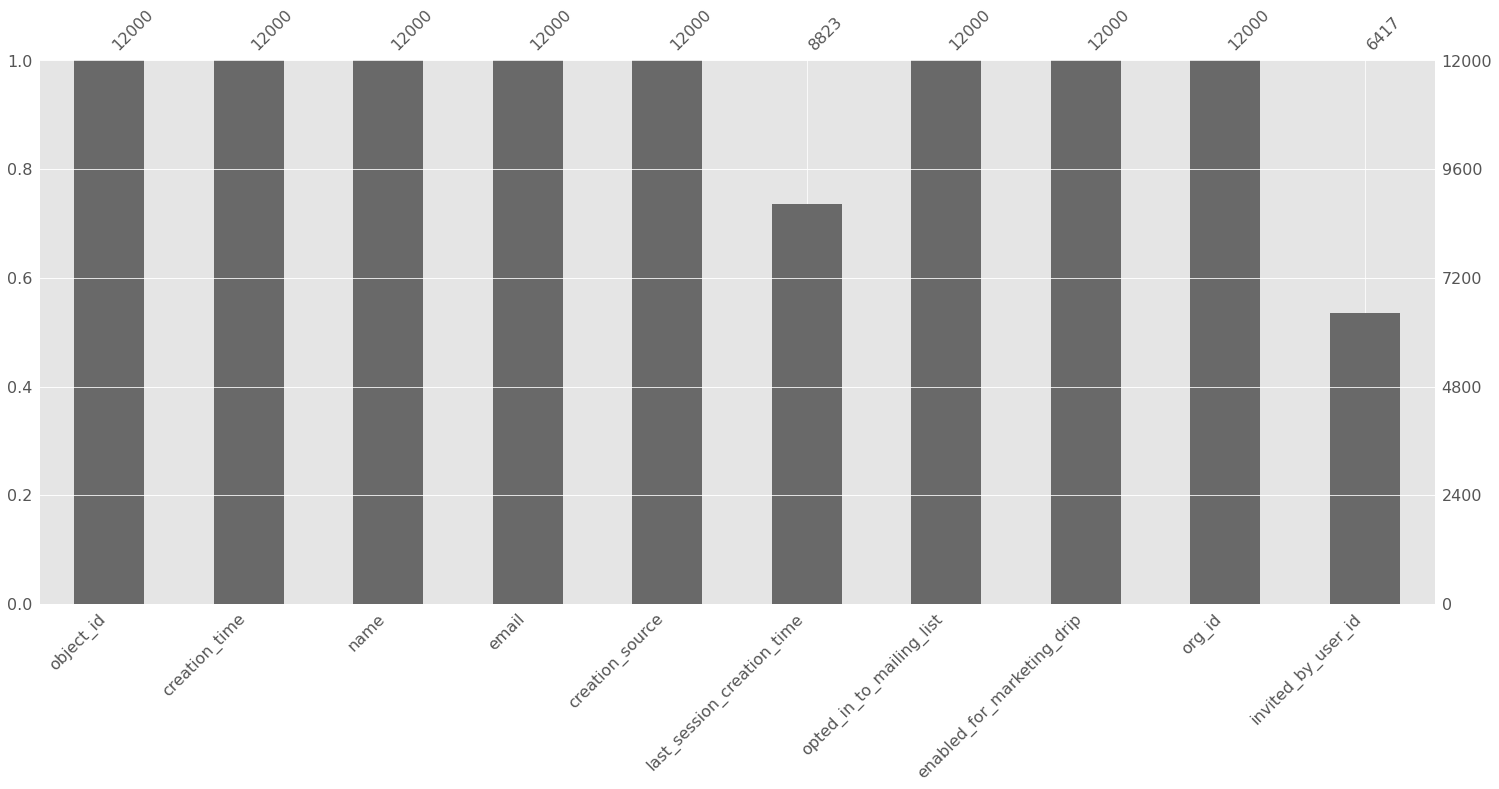

In [7]:
plt.figure(figsize=(10, 5))
# msn.matrix(df1)
msn.bar(df1) # Missing datas
plt.show()

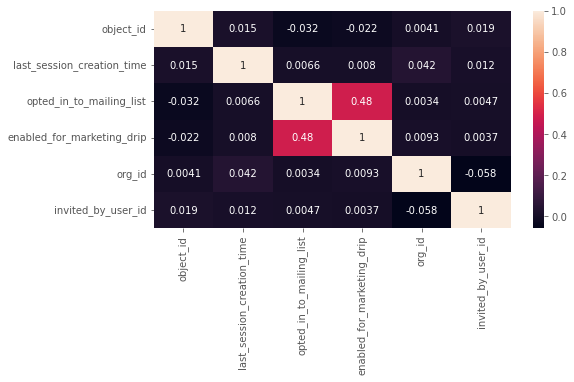

In [8]:
plt.figure(figsize=(8,4))
sns.heatmap(df1.corr(), annot=True)
plt.show()

> takehome_user_engagement.csv

In [9]:
df2 = pd.read_csv('takehome_user_engagement.csv')
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [10]:
df2.shape

(207917, 3)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [12]:
df2.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [13]:
df2.corr()

,user_id,visited
user_id,1.0,NaN
visited,NaN,NaN


In [14]:
df2.nunique()

time_stamp    207220
user_id         8823
visited            1
dtype: int64

## Observation
-----------------
1. In df1, their are correlation between features which are over 5%.
2. opted_in_to_mailing_list and enabled_for_marketing_drip have correlation of 48%
3. org_id & invited_by_user_id have 2.8% correlation.
4. df2 have no correlation features.

# Pre-Processing

## df1 Column-wise

In [15]:
df1.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

object_id

In [16]:
print(df1.object_id.nunique(), df1.object_id.dtype)

12000 int64


In [17]:
df1.object_id.isnull().sum()

0

creation_time

In [18]:
print(df1.creation_time.nunique(), df1.creation_time.dtype)

11996 object


In [19]:
df1.creation_time = pd.to_datetime(df1.creation_time)
print(df1.creation_time.dtype)

datetime64[ns]


In [20]:
df1.creation_time.isnull().sum()

0

name

In [21]:
df1.name.nunique()

11349

In [22]:
df1.name.duplicated().sum()

651

In [23]:
df1.name.isnull().sum()

0

email

In [24]:
df1.email.nunique()

11980

In [25]:
df1.email.duplicated().sum()

20

In [26]:
df1.email.isnull().sum()

0

In [27]:
df1.email = df1.email.str.lower()

creation_source

In [28]:
df1.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [29]:
df1.creation_source.isnull().sum()

0

last_session_creation_time

In [30]:
df1.last_session_creation_time.value_counts()

1.401868e+09    2
1.401917e+09    2
1.398139e+09    1
1.381812e+09    1
1.400737e+09    1
               ..
1.393803e+09    1
1.343116e+09    1
1.382131e+09    1
1.373158e+09    1
1.390727e+09    1
Name: last_session_creation_time, Length: 8821, dtype: int64

In [31]:
df1.last_session_creation_time = pd.to_datetime(df1.last_session_creation_time, unit='s')
df1.last_session_creation_time.head()

0   2014-04-22 03:53:30
1   2014-03-31 03:45:04
2   2013-03-19 23:14:52
3   2013-05-22 08:09:28
4   2013-01-22 10:14:20
Name: last_session_creation_time, dtype: datetime64[ns]

In [32]:
df1.last_session_creation_time.fillna(df1.creation_time, inplace=True)

In [33]:
df1.last_session_creation_time.isnull().sum()

0

opted_in_to_mailing_list

In [34]:
df1.opted_in_to_mailing_list.value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

In [35]:
df1.opted_in_to_mailing_list.isnull().sum()

0

enabled_for_marketing_drip

In [36]:
df1.enabled_for_marketing_drip.value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

In [37]:
df1.enabled_for_marketing_drip.isnull().sum()

0

org_id

In [38]:
df1.org_id.isnull().sum()

0

In [39]:
df1.org_id.nunique()

417

invited_by_user_id

In [40]:
df1.invited_by_user_id.isnull().sum()

5583

In [41]:
# df1.invited_by_user_id = df1.invited_by_user_id.replace(np.nan, 0)

In [42]:
# df1.invited_by_user_id = df1.invited_by_user_id.astype('int')

In [43]:
df1.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
1525.0     11
11770.0    11
2308.0     11
           ..
1390.0      1
5445.0      1
8526.0      1
4695.0      1
5450.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

In [44]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,augustcclausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,mitchellbottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,nicklassclausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,graceraw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


## df2 Column-wise

In [45]:
print(df2.columns, df2.shape)

Index(['time_stamp', 'user_id', 'visited'], dtype='object') (207917, 3)


time_stamp

In [46]:
print(df2.time_stamp.nunique(), df2.time_stamp.dtype)

207220 object


In [47]:
df2.time_stamp = pd.to_datetime(df2.time_stamp)
print(df2.time_stamp.dtype)

datetime64[ns]


In [48]:
df2.time_stamp.isnull().sum()

0

user_id

In [49]:
print(df2.user_id.nunique(), df2.user_id.dtype)

8823 int64


In [50]:
df2.user_id.isnull().sum()

0

visited

In [51]:
print(df2.visited.value_counts(), df2.visited.dtype)

1    207917
Name: visited, dtype: int64 int64


In [52]:
df2.visited.isnull().sum()

0

In [53]:
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


## Merge DataFrame df1 & df2

In [54]:
# We will merge data on object_id, so lets rename user_id in df2 to object_id
# df2.rename(columns={'user_id':'object_id'}, inplace=True)
# df2.head()

In [55]:
# df = pd.merge(df1, df2, how='outer', on='object_id')
# df.head()

In [56]:
# df[df.object_id == 2].head(10) #Checking object_id = 2 details

In [57]:
# df.shape

In [58]:
# df.isnull().sum()

In [59]:
# df = df.replace(np.nan, 0)
# df.shape

In [60]:
# df.drop_duplicates(inplace=True)
# df.shape

In [61]:
# df.describe()

### Save Cleaned df

In [62]:
# df.to_csv('takehome_cleaned_df.csv')

In [63]:
# df.head()

## Observation
-----------------
1. object_id, creation_time, name, email, creation_source, opted_in_to_mailing_list, enabled_for_marketing_drip, org_id, time_stamp, user_id, visited doesn't have any null values.
2. email column text have been converted to lower case.
3. last_session_creation_time column null values replaced with creation_time.
4. creation_time, last_session_creation_time columns datatype changed to datetime type.
5. invited_by_user_id null values replaced with zero.
6. user_id is replaced with object_id. And df dataframe is created by merging df1 & df2 using object_id as common column.

# 3. Feature Engineering

## Account Creation Year & Month

In [64]:
df1['creation_year'] = df1.creation_time.dt.year
df1['creation_month'] = df1.creation_time.dt.month

In [65]:
new_order = ['object_id', 'creation_time', 'creation_year', 'creation_month', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id']
df1 = df1.reindex(columns=new_order)
df1.head()

,object_id,creation_time,creation_year,creation_month,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,2014,4,Clausen August,augustcclausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,2013,11,Poole Matthew,matthewpoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,2013,3,Bottrill Mitchell,mitchellbottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,2013,5,Clausen Nicklas,nicklassclausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,2013,1,Raw Grace,graceraw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


## User Login Year-Month-Week-Time data

In [66]:
df2['year'] = df2.time_stamp.dt.year
df2['month'] = df2.time_stamp.dt.month
df2['year_week'] = df2.time_stamp.dt.strftime('%Y-%W')
df2['time'] = df2.time_stamp.dt.strftime('%H.%M')

In [67]:
new_order = ['time_stamp', 'year', 'month', 'time', 'year_week', 'user_id', 'visited']
df2 = df2.reindex(columns=new_order)
df2.head()

,time_stamp,year,month,time,year_week,user_id,visited
0,2014-04-22 03:53:30,2014,4,03.53,2014-16,1,1
1,2013-11-15 03:45:04,2013,11,03.45,2013-45,2,1
2,2013-11-29 03:45:04,2013,11,03.45,2013-47,2,1
3,2013-12-09 03:45:04,2013,12,03.45,2013-49,2,1
4,2013-12-25 03:45:04,2013,12,03.45,2013-51,2,1


## Adopted User

In [68]:
# Time period function
def time_period(df):
    if df.time >= 0 and df.time < 3:
        return 'Mid Night'
    elif df.time >=3 and df.time < 6:
        return 'Early Morning'
    elif df.time >= 6 and df.time < 9:
        return 'Morning'
    elif df.time >= 9 and df.time < 12:
        return 'Late Morning'
    elif df.time >=12 and df.time < 15:
        return 'Mid Noon'
    elif df.time >= 15 and df.time < 18:
        return 'After Noon'
    elif df.time >= 18 and df.time < 21:
        return 'Evening'
    else:
        return 'Night'

In [69]:
adopted_user_df = df2.groupby(['year_week', 'user_id', 'time'])['time_stamp'].count().reset_index(name='freq')
adopted_user_df = adopted_user_df[adopted_user_df.freq >= 3]
adopted_user_df.time = adopted_user_df.time.astype('float')
adopted_user_df['time_period'] = adopted_user_df.apply(time_period, axis=1)
adopted_user_df

,year_week,user_id,time,freq,time_period
39,2012-23,1693,21.58,3,Night
96,2012-24,728,16.04,4,After Noon
177,2012-24,11764,17.40,3,After Noon
195,2012-25,1693,21.58,3,Night
223,2012-25,5297,17.32,3,After Noon
...,...,...,...,...,...
69480,2014-22,11573,8.50,3,Morning
69484,2014-22,11688,5.23,3,Early Morning
69488,2014-22,11806,9.48,3,Late Morning
69493,2014-22,11895,4.14,3,Early Morning


In [70]:
adopted_user_df.to_csv('adopted_user_df.csv')
adopted_user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33711 entries, 39 to 69495
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year_week    33711 non-null  object 
 1   user_id      33711 non-null  int64  
 2   time         33711 non-null  float64
 3   freq         33711 non-null  int64  
 4   time_period  33711 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.5+ MB


# 4. Exploratory Data Analysis

## 4.1 Account creation analysis

In [92]:
df1.creation_year.unique()
# Three years of data are present

array([2014, 2013, 2012], dtype=int64)

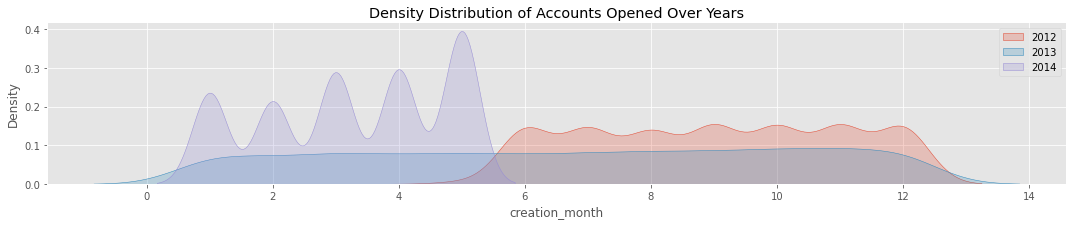

In [133]:
# Year wise account opening density distribution plot
sns.FacetGrid(df1, hue='creation_year', aspect=5).map(sns.kdeplot, 'creation_month', shade=True)
plt.title('Density Distribution of Accounts Opened Over Years')
plt.legend(labels=[2012, 2013, 2014])
plt.show()

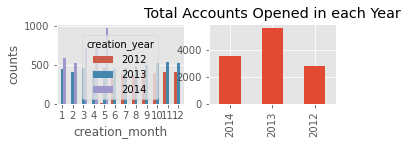

In [134]:
# plt.figure(figsize=(20, 20))
plt.subplot(321)
cc = df1.groupby(['creation_year'])['creation_month'].value_counts().reset_index(name='counts')
sns.barplot(x=cc.creation_month, y=cc.counts, hue=cc.creation_year)

plt.subplot(322)
df1.creation_year.value_counts(sort=False).plot(kind='bar', figsize=(5,5))
plt.title('Total Accounts Opened in each Year')
plt.show()

<AxesSubplot:xlabel='creation_month', ylabel='counts'>

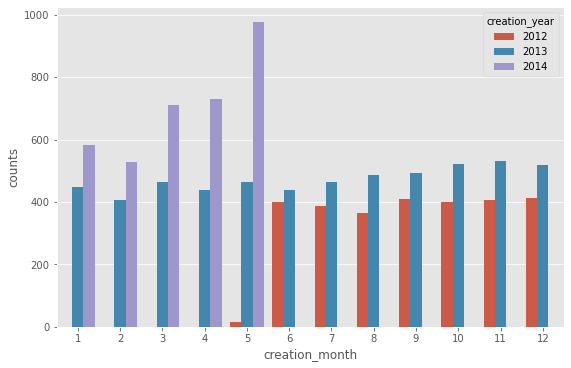

In [137]:
plt.figure(figsize=(20, 20))
plt.subplot(321)
cc = df1.groupby(['creation_year'])['creation_month'].value_counts().reset_index(name='counts')
sns.barplot(x=cc.creation_month, y=cc.counts, hue=cc.creation_year)

plt.subplot(322)
df1.creation_year.value_counts(sort=False).plot(kind='bar', figsize=(5,5))
plt.title('Total Accounts Opened in each Year')

### Observations
-----------------
1. 

## 4.2 Multiple account users

## 4.3 Mailing

## 4.4 Organization-ID

## 4.5 Logged timestamp

# ML Models